In [37]:
import pandas as pd
from CellSegmentationTracker_dev import CellSegmentationTracker
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

#### TODO:
* Fig out how to reshape and save data so it can be fed to matlab


In [41]:
 # Load matlab file
path32 = "C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp\\MDCK_well2_piv_settings_32_16_16_remesh_meshsize_20.mat"
path64 = "C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp\\MDCK_well2_piv_settings_64_32_32_16.mat"
spots_path = "C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp\\MDCK_well2_crop_xyCorrected_spots.csv"

mat32 = scipy.io.loadmat(path32)
math64 = scipy.io.loadmat(path64)

remesh = True
extension = '_PIV' if remesh else ''


x32 = mat32[f'X{extension}'][0][0]
y32 = mat32[f'Y{extension}'][0][0]


xmin, xmax = x32.min(), x32.max()
ymin, ymax = y32.min(), y32.max()
mesh_size_x = x32[1][0] - x32[0][0]
mesh_size_y = y32[0][1] - y32[0][0]
assert(mesh_size_x == mesh_size_y)
Lx = xmax - xmin + mesh_size_x
Ly = ymax - ymin + mesh_size_y

Ngrid = int(min(Lx, Ly) / mesh_size_x)

print(min(Lx, Ly) / mesh_size_x)
print(xmin, xmax, ymin, ymax, mesh_size_x, mesh_size_y, Ngrid)
print(np.unique(x32).shape, np.unique(y32).shape)

grid_bounds = [(xmin - mesh_size_x / 2, xmax + mesh_size_x / 2), (ymin - mesh_size_y / 2, ymax + mesh_size_y / 2)]


75.0
508.625 2708.625 510.25 1990.25 20.0 20.0 75
(111,) (75,)


In [42]:
# Initialize CellSegmentationTracker object
output_folder= "C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp"
cst = CellSegmentationTracker(output_folder_path=output_folder)

# Set path to spots csv file
cst.spots_df = pd.read_csv(spots_path)

# Crop csv
#cst.spots_df = spots_df[(spots_df['X'] >= xmin) & (spots_df['X'] <= xmax) & (spots_df['Y'] >= ymin) & (spots_df['Y'] <= ymax)]

#cst.grid_df = pd.read_csv("C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp\\MDCK_well2_grid_stats.csv")

cst.calculate_grid_statistics(grid_boundaries = grid_bounds, Ngrid = Ngrid, name = f"MDCK_well2_grid_stats_mesh_size_{mesh_size_x}",)

print(cst.grid_df.info())



Average cell diameter:  12.386394991798262   pixels
Dimensions of region to be gritted:  2220.0  x  1500.0   pixels$^2$

Average no. of cells per grid:  1.03

Grid dataframe saved as csv file at:  C:\Users\Simon Andersen\Documents\Uni\SummerProject\gHZIcyBQnp\MDCK_well2_grid_stats_mesh_size_20.0.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91575 entries, 0 to 91574
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Frame            91575 non-null  float64
 1   T                91575 non-null  float64
 2   Ngrid            91575 non-null  float64
 3   x_center         91575 non-null  float64
 4   y_center         91575 non-null  float64
 5   cell_number      91575 non-null  float64
 6   number_density   91575 non-null  float64
 7   mean_velocity_X  70257 non-null  float64
 8   mean_velocity_Y  70257 non-null  float64
dtypes: float64(9)
memory usage: 6.3 MB
None


In [9]:

print(cst.grid_df.info())
print(cst.grid_df.loc[:,['x_center', 'y_center']].describe())
print(np.unique(cst.grid_df.loc[:,['x_center']].values).shape)
print(np.unique(cst.grid_df.loc[:,['y_center']].values).shape)
print(cst.grid_df.loc[:,'mean_velocity_X'].isna().sum())
print(cst.grid_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216315 entries, 0 to 216314
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Frame            216315 non-null  float64
 1   T                216315 non-null  float64
 2   Ngrid            216315 non-null  float64
 3   x_center         216315 non-null  float64
 4   y_center         216315 non-null  float64
 5   cell_number      216315 non-null  float64
 6   number_density   216315 non-null  float64
 7   mean_velocity_X  89730 non-null   float64
 8   mean_velocity_Y  89730 non-null   float64
dtypes: float64(9)
memory usage: 14.9 MB
None
            x_center       y_center
count  216315.000000  216315.000000
mean     1613.625000    1251.250000
std       641.715334     431.554007
min       508.625000     510.250000
25%      1054.625000     874.250000
50%      1613.625000    1251.250000
75%      2172.625000    1628.250000
max      2718.625000    1992.250000
(17

In [5]:
# Initialize CellSegmentationTracker object
output_folder= "C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp"
cst = CellSegmentationTracker(output_folder_path=output_folder)

# Set path to spots csv file
cst.spots_df = pd.read_csv(spots_path)

In [11]:
path = 'C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp\\MDCK_well2_grid_stats.csv'
path2 = 'C:\\Users\\Simon Andersen\\Documents\\Uni\\SummerProject\\gHZIcyBQnp\\MDCK_well2_grid_statistics_interpolated.csv'
dir_name = os.path.dirname(path)

grid_csv = pd.read_csv(path, sep=',')
grid_mod_csv = pd.read_csv(path2, sep=',')

In [ ]:
Nframes = grid_csv['Frame'].max() + 1
Nsquares = 0
for frame in np.arange(Nframes):
    # find data for given frame
    frame_data = grid_csv[grid_csv['Frame'] == frame]
    Nsquares = frame_data.shape[0]
    frame_data_mod = grid_mod_csv[grid_mod_csv['Frame'] == frame]
    print(frame_data_mod.info())
    print(frame_data.info())
    print(frame_data_mod.loc[:,['x_center', 'y_center','interp_velocity_X', 'interp_velocity_Y']].describe())
    print(frame_data.loc[:,['x_center', 'y_center','mean_velocity_X', 'mean_velocity_Y']].describe())

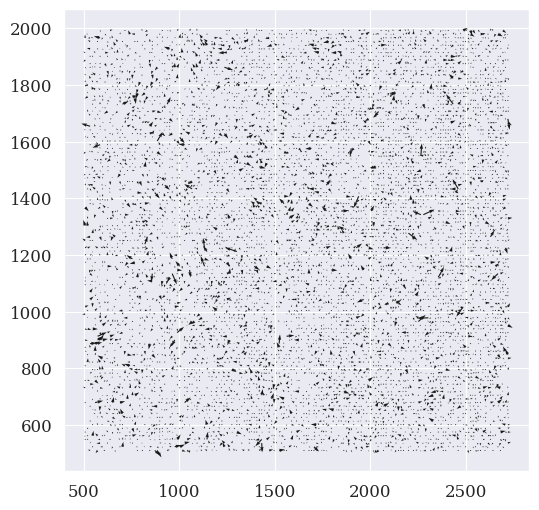

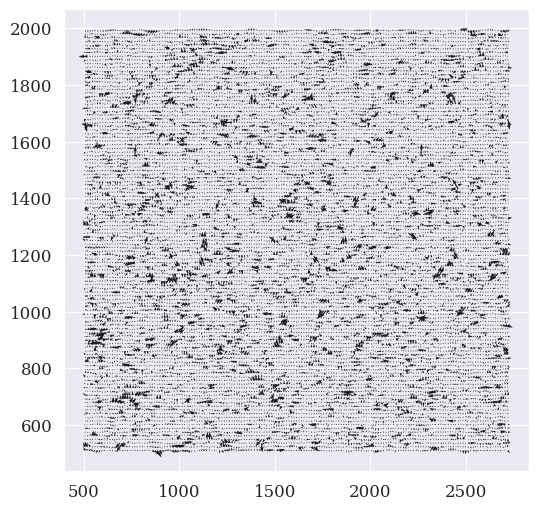

In [30]:
x_centers = np.unique(grid_csv['x_center'].values)
y_centers = np.unique(grid_csv['y_center'].values)
Nx = len(x_centers)
Ny = len(y_centers)
Nsquares = Nx * Ny-1
X = grid_csv.loc[:Nsquares, 'x_center'].values.reshape(Ny, Nx)
Y = grid_csv.loc[:Nsquares, 'y_center'].values.reshape(Ny, Nx)

frame = 0
data = grid_csv.values
data_mod = grid_mod_csv.values

arr_vx = data[data[:, 0] == frame,-2].reshape(Ny, Nx)
arr_vy = data[data[:, 0] == frame, -1].reshape(Ny, Nx)

arr_vx_mod = data_mod[data_mod[:, 0] == frame,-2].reshape(Ny, Nx)
arr_vy_mod = data_mod[data_mod[:, 0] == frame, -1].reshape(Ny, Nx)

fig = plt.figure(figsize=(6,6))
plt.quiver(X, Y, arr_vx, arr_vy, units='dots', scale_units='dots' )
plt.show()
fig = plt.figure(figsize=(6,6))
plt.quiver(X, Y, arr_vx_mod, arr_vy_mod, units='dots', scale_units='dots' )
plt.show()